In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
num_epochs = 100
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
x_in = tf.placeholder(tf.float32, shape=[None, 2])
y_hat = tf.placeholder(tf.float32, shape=[None, 1])

# perceptron just dot product + b
w = tf.Variable(tf.random_normal(shape=[2,1]), tf.float32)
b = tf.Variable(tf.zeros([1,1]),tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [22]:
# copied and adapted from class sample code
y = tf.round(tf.sigmoid(tf.add(tf.matmul(x_in, w),b)))
#the error between target and logit
error = y - y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(x_in),error)
db = tf.reduce_sum(error,0)
W_ = w + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(w.assign(W_), b.assign(b_))

# accuracy measure, will divide later
acc = tf.reduce_sum(tf.cast(tf.equal(y,y_hat), tf.float32))

In [23]:
y_train_1.shape

(105, 1)

<h2>Execute training</h2>

In [26]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
py_acc = []

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_epochs):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {x_in: x_train_1, y_hat: y_train_1})
        py_acc.append(sess.run(acc,feed_dict = {x_in: x_train_1, y_hat: y_train_1}))
        # need to compute the accuracy here
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    py_w = np.squeeze(sess.run(w))
    py_b = np.squeeze(sess.run(b))
    

<h2>Plot</h2>

Test Error is: 	0.4


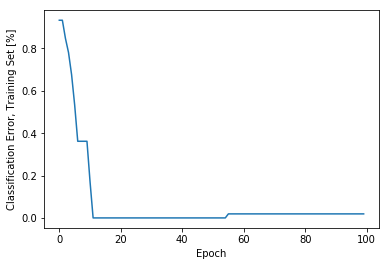

In [49]:
# accuracy curve, in terms of classification error percentage
plt.figure(1)
plt.plot(np.array(py_acc) / len(y_train_1))
plt.xlabel('Epoch')
plt.ylabel('Classification Error, Training Set [%]')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# compute test error
pred = np.round(sigmoid(x_test_1 @ py_w + py_b))
error = np.sum(pred - np.squeeze(y_test_1)) / y_test_1.shape[0]

print('Test Error is: \t' + str(error))

0.4

<h1>Part b:</h1>

In [ ]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

<h2>Define hyper-parameter</h2>

<h2>Define Placeholder and Variables</h2>

In [ ]:
tf.reset_default_graph()

<h2>Define update rule and accuracy</h2>

<h2>Execute training</h2>

<h2>Plot</h2>

<h1>Part c:</h1>

In [ ]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

<h2>Define hyper-parameters</h2>

<h2>Define placehoder and variables</h2>

In [ ]:
tf.reset_default_graph()

<h2>Define the neural network</h2>

<h2>Define cost function and accuracy</h2>

<h2>Execute training</h2>

<h2>Plot</h2>